In [32]:
import networkx as nx
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import time
from collections import Counter
%matplotlib inline 
from tqdm import tqdm
from numpy.random import choice

# parameters

alpha = 0.15
a = [1, 2, 4]

def read_folder() : # ok
    all_files = sorted(os.listdir(path = "/Users/danielchoy1314/Downloads/as-733"))
    # print(all_files)
    return all_files

def envolving_graph(file):    
    f = open(file)
    G = nx.Graph()

    n_lines = len(f.readlines())
    # print(n_lines)
    f = open(file)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)

    for i in range(4, n_lines) :
        line = f.readline()      
        line = line[:-1]
        line = line.split("\t")
        a = int(line[0])
        b = int(line[1])
        G.add_edge(a,b)

    f.close()
    return G

def current_graph(file) :
    f = open(file)
    r = nx.Graph()

    n_lines = len(f.readlines())
    # print(n_lines)
    f = open(file)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)

    for i in range(4, n_lines):
        line = f.readline()
        line = line[:-1]
        line = line.split("\t")
        a = int(line[0])
        b = int(line[1])
        r.add_edge(a, b)
        
    f.close()
    return r

def update_graph(graph, newnode) :
    G = graph
    E = list(G.edges())

    edge = random.choice(E)
    u = edge[0]
    v = edge[1]

    # change of head
    G.remove_edge(u,v)
    u = newnode
    G.add_edge(u, v)

    return G # new graph

def prportional_probing(current_graph, pagerank) :
    # print(dict(sorted(pagerank.items())).values())
    # print(sorted(list(current_graph.nodes())))
    picked_node = choice(sorted(list(current_graph.nodes())), p=list(dict(sorted(pagerank.items())).values()))                           
    return picked_node

def PowerIteration(graph) :
    V = list(graph.nodes())
    n = len(V)
    for i in range(len(V)):
        v = V[i]
        graph.nodes[v]["old_pi"] = 1/n
        graph.nodes[v]["new_pi"] = 1/n

    # power iterations
    iterations_count = 0
    while True:
        iterations_count += 1  # (pi(1)->pi(t))
        # iterate
        for i in range(len(V)):
            v = V[i]
            graph.nodes[v]["old_pi"] = graph.nodes[v]["new_pi"]
            graph.nodes[v]["new_pi"] = 0

        for i in range(len(V)):
            v = V[i]
            temp = 0
            for u in graph.neighbors(v):
                temp += graph.nodes[u]["old_pi"] / len(list(graph.neighbors(u)))
            graph.nodes[v]["new_pi"] = (1 - alpha) * temp + alpha / n

        # check convergence
        tol = 0
        for i in range(len(V)):
            v = V[i]
            tol += np.abs(graph.nodes[v]["old_pi"] - graph.nodes[v]["new_pi"])

        if tol < 1e-9:
            # print("convergence")
            break

    # set an attribute true pagerank pi to all nodes

    pagerank = {}
    for i in range(len(V)):
        v = V[i]
        pagerank[v] = graph.nodes[v]["new_pi"]
        graph.nodes[v]["real.pi"] = graph.nodes[v]["new_pi"]

    return pagerank

def L_error(true_pi, estimated_pi) :
    # L1 = sum of (estimated_pi - true_pi) at any time step t
    # Linfinity = max error of pagerank
    
    list = []
    for key in true_pi:
        if key not in list:
            list.append(key)

    for key in estimated_pi:
        if key not in list:
            list.append(key)
     
    check= len(set(list)) == len(list)
    
    if(check) : # whether all distinct node
        print("True")
    else :
        print("false")
        
    # print(true_pi[list[1]])
    # print(estimated_pi[list[1]])
    # print(list[1])
    # print(len(list))    
    result = np.zeros(len(list))

    # print(estimated_pi(list[1]))
    # print(len(list))
    
    count = 0
    for i in range(len(list)) :
        if((list[i] in estimated_pi) and (list[i] in true_pi )) :
            result[i] = abs((estimated_pi[list[i]])-(true_pi[list[i]]))          
        elif ((list[i] in estimated_pi) and (list[i] not in true_pi)) :
            result[i] = estimated_pi[list[i]]            
        else :
            result[i] = true_pi[list[i]] 
        count+=result[i]
        
    # print(count)
    # print(max(result))
    return count , max(result)


In [33]:
list_of_file = read_folder()

for i in range(len(list_of_file)) :
    list_of_file[i] = "/Users/danielchoy1314/Downloads/as-733/" + list_of_file[i]  
    
# print(len(list_of_file))

G = envolving_graph(list_of_file[0])
# print(len(list(G.edges())))

K = 1 # recomputing frequency 
changes = []
L1_metric = []
Linfinity_metric = []

for i in tqdm(range(1,len(list_of_file)),desc="Loading…", ascii=False, ncols=75) :
    g = current_graph(list_of_file[i])
    true_pi = PowerIteration(g) 
#______________________________________________________________________#
    for j in range(K) :
        node = prportional_probing(g, true_pi)
        G = update_graph(G, node)        
    changes.append(K)
    K+=1
    estimated_pi = PowerIteration(G)
    
    L1_error, Linfinity_error = L_error(true_pi, estimated_pi)
    L1_metric.append(L1_error)
    Linfinity_metric.append(Linfinity_error)

    
print("Complete")


Loading…:   0%|                          | 1/732 [00:06<1:14:15,  6.09s/it]

True


Loading…:   0%|                          | 2/732 [00:11<1:12:02,  5.92s/it]

True


Loading…:   0%|                          | 3/732 [00:17<1:11:52,  5.92s/it]

True


Loading…:   1%|▏                         | 4/732 [00:22<1:09:32,  5.73s/it]

True


Loading…:   1%|▏                         | 5/732 [00:27<1:06:41,  5.50s/it]

True


Loading…:   1%|▏                         | 6/732 [00:33<1:06:17,  5.48s/it]

True


Loading…:   1%|▏                         | 7/732 [00:38<1:05:49,  5.45s/it]

True


Loading…:   1%|▎                         | 8/732 [00:43<1:05:25,  5.42s/it]

True


Loading…:   1%|▎                         | 9/732 [00:49<1:05:07,  5.40s/it]

True


Loading…:   1%|▎                        | 10/732 [00:54<1:05:01,  5.40s/it]

True


Loading…:   2%|▍                        | 11/732 [01:00<1:04:47,  5.39s/it]

True


Loading…:   2%|▍                        | 12/732 [01:05<1:04:47,  5.40s/it]

True


Loading…:   2%|▍                        | 13/732 [01:10<1:04:36,  5.39s/it]

True


Loading…:   2%|▍                        | 14/732 [01:16<1:04:35,  5.40s/it]

True


Loading…:   2%|▌                        | 15/732 [01:21<1:04:09,  5.37s/it]

True


Loading…:   2%|▌                        | 16/732 [01:26<1:03:56,  5.36s/it]

True


Loading…:   2%|▌                        | 17/732 [01:32<1:03:49,  5.36s/it]

True


Loading…:   2%|▌                        | 18/732 [01:37<1:04:15,  5.40s/it]

True


Loading…:   3%|▋                        | 19/732 [01:43<1:03:50,  5.37s/it]

True


Loading…:   3%|▋                        | 20/732 [01:48<1:05:11,  5.49s/it]

True


Loading…:   3%|▋                        | 21/732 [01:54<1:06:33,  5.62s/it]

True


Loading…:   3%|▊                        | 22/732 [02:00<1:06:30,  5.62s/it]

True


Loading…:   3%|▊                        | 23/732 [02:05<1:05:55,  5.58s/it]

True


Loading…:   3%|▊                        | 24/732 [02:11<1:04:56,  5.50s/it]

True


Loading…:   3%|▊                        | 25/732 [02:16<1:04:22,  5.46s/it]

True


Loading…:   4%|▉                        | 26/732 [02:21<1:04:02,  5.44s/it]

True


Loading…:   4%|▉                        | 27/732 [02:27<1:03:37,  5.41s/it]

True


Loading…:   4%|▉                        | 28/732 [02:32<1:03:38,  5.42s/it]

True


Loading…:   4%|▉                        | 29/732 [02:38<1:04:08,  5.47s/it]

True


Loading…:   4%|█                        | 30/732 [02:43<1:04:01,  5.47s/it]

True


Loading…:   4%|█                        | 31/732 [02:49<1:04:05,  5.49s/it]

True


Loading…:   4%|█                        | 32/732 [02:54<1:04:26,  5.52s/it]

True


Loading…:   5%|█▏                       | 33/732 [03:00<1:03:55,  5.49s/it]

True


Loading…:   5%|█▏                       | 34/732 [03:05<1:04:14,  5.52s/it]

True


Loading…:   5%|█▏                       | 35/732 [03:11<1:04:13,  5.53s/it]

True


Loading…:   5%|█▏                       | 36/732 [03:16<1:03:53,  5.51s/it]

True


Loading…:   5%|█▎                       | 37/732 [03:22<1:03:28,  5.48s/it]

True


Loading…:   5%|█▎                       | 38/732 [03:27<1:03:34,  5.50s/it]

True


Loading…:   5%|█▎                       | 39/732 [03:33<1:03:00,  5.46s/it]

True


Loading…:   5%|█▎                       | 40/732 [03:38<1:02:52,  5.45s/it]

True


Loading…:   6%|█▍                       | 41/732 [03:44<1:02:37,  5.44s/it]

True


Loading…:   6%|█▍                       | 42/732 [03:49<1:02:37,  5.45s/it]

True


Loading…:   6%|█▍                       | 43/732 [03:55<1:02:54,  5.48s/it]

True


Loading…:   6%|█▌                       | 44/732 [04:00<1:02:39,  5.46s/it]

True


Loading…:   6%|█▌                       | 45/732 [04:05<1:01:55,  5.41s/it]

True


Loading…:   6%|█▌                       | 46/732 [04:11<1:01:22,  5.37s/it]

True


Loading…:   6%|█▌                       | 47/732 [04:16<1:01:02,  5.35s/it]

True


Loading…:   7%|█▋                       | 48/732 [04:21<1:00:32,  5.31s/it]

True


Loading…:   7%|█▋                       | 49/732 [04:26<1:00:15,  5.29s/it]

True


Loading…:   7%|█▊                         | 50/732 [04:32<59:40,  5.25s/it]

True


Loading…:   7%|█▉                         | 51/732 [04:37<59:35,  5.25s/it]

True


Loading…:   7%|█▉                         | 52/732 [04:42<59:41,  5.27s/it]

True


Loading…:   7%|█▉                         | 53/732 [04:47<59:23,  5.25s/it]

True


Loading…:   7%|█▉                         | 54/732 [04:53<59:18,  5.25s/it]

True


Loading…:   8%|█▉                       | 55/732 [04:58<1:00:24,  5.35s/it]

True


Loading…:   8%|██                         | 56/732 [05:03<59:56,  5.32s/it]

True


Loading…:   8%|██                         | 57/732 [05:09<59:52,  5.32s/it]

True


Loading…:   8%|██▏                        | 58/732 [05:14<59:54,  5.33s/it]

True


Loading…:   8%|██▏                        | 59/732 [05:19<59:53,  5.34s/it]

True


Loading…:   8%|██                       | 60/732 [05:25<1:00:10,  5.37s/it]

True


Loading…:   8%|██                       | 61/732 [05:30<1:00:39,  5.42s/it]

True


Loading…:   8%|██                       | 62/732 [05:36<1:00:42,  5.44s/it]

True


Loading…:   9%|██▏                      | 63/732 [05:42<1:01:45,  5.54s/it]

True


Loading…:   9%|██▏                      | 64/732 [05:48<1:02:46,  5.64s/it]

True


Loading…:   9%|██▏                      | 65/732 [05:53<1:03:34,  5.72s/it]

True


Loading…:   9%|██▎                      | 66/732 [05:59<1:03:48,  5.75s/it]

True


Loading…:   9%|██▎                      | 67/732 [06:05<1:03:58,  5.77s/it]

True


Loading…:   9%|██▎                      | 68/732 [06:11<1:03:25,  5.73s/it]

True


Loading…:   9%|██▎                      | 69/732 [06:16<1:03:00,  5.70s/it]

True


Loading…:  10%|██▍                      | 70/732 [06:22<1:02:35,  5.67s/it]

True


Loading…:  10%|██▍                      | 71/732 [06:28<1:02:11,  5.64s/it]

True


Loading…:  10%|██▍                      | 72/732 [06:33<1:01:35,  5.60s/it]

True


Loading…:  10%|██▍                      | 73/732 [06:39<1:01:33,  5.60s/it]

True


Loading…:  10%|██▌                      | 74/732 [06:44<1:01:37,  5.62s/it]

True


Loading…:  10%|██▌                      | 75/732 [06:50<1:01:21,  5.60s/it]

True


Loading…:  10%|██▌                      | 76/732 [06:56<1:01:34,  5.63s/it]

True


Loading…:  11%|██▋                      | 77/732 [07:01<1:01:32,  5.64s/it]

True


Loading…:  11%|██▋                      | 78/732 [07:07<1:01:23,  5.63s/it]

True


Loading…:  11%|██▋                      | 79/732 [07:12<1:01:12,  5.62s/it]

True


Loading…:  11%|██▋                      | 80/732 [07:18<1:01:16,  5.64s/it]

True


Loading…:  11%|██▊                      | 81/732 [07:24<1:01:20,  5.65s/it]

True


Loading…:  11%|██▊                      | 82/732 [07:29<1:01:12,  5.65s/it]

True


Loading…:  11%|██▊                      | 83/732 [07:35<1:01:19,  5.67s/it]

True


Loading…:  11%|██▊                      | 84/732 [07:41<1:01:07,  5.66s/it]

True


Loading…:  12%|██▉                      | 85/732 [07:47<1:02:43,  5.82s/it]

True


Loading…:  12%|██▉                      | 86/732 [07:53<1:02:53,  5.84s/it]

True


Loading…:  12%|██▉                      | 87/732 [07:59<1:02:13,  5.79s/it]

True


Loading…:  12%|███                      | 88/732 [08:04<1:02:24,  5.81s/it]

True


Loading…:  12%|███                      | 89/732 [08:10<1:01:44,  5.76s/it]

True


Loading…:  12%|███                      | 90/732 [08:16<1:01:24,  5.74s/it]

True


Loading…:  12%|███                      | 91/732 [08:22<1:01:55,  5.80s/it]

True


Loading…:  13%|███▏                     | 92/732 [08:28<1:02:11,  5.83s/it]

True


Loading…:  13%|███▏                     | 93/732 [08:33<1:01:58,  5.82s/it]

True


Loading…:  13%|███▏                     | 94/732 [08:39<1:02:03,  5.84s/it]

True


Loading…:  13%|███▏                     | 95/732 [08:45<1:01:44,  5.82s/it]

True


Loading…:  13%|███▎                     | 96/732 [08:51<1:01:42,  5.82s/it]

True


Loading…:  13%|███▎                     | 97/732 [08:57<1:02:38,  5.92s/it]

True


Loading…:  13%|███▎                     | 98/732 [09:03<1:02:13,  5.89s/it]

True


Loading…:  14%|███▍                     | 99/732 [09:09<1:02:25,  5.92s/it]

True


Loading…:  14%|███▎                    | 100/732 [09:15<1:02:59,  5.98s/it]

True


Loading…:  14%|███▎                    | 101/732 [09:21<1:02:16,  5.92s/it]

True


Loading…:  14%|███▎                    | 102/732 [09:27<1:02:05,  5.91s/it]

True


Loading…:  14%|███▍                    | 103/732 [09:33<1:02:15,  5.94s/it]

True


Loading…:  14%|███▍                    | 104/732 [09:38<1:01:55,  5.92s/it]

True


Loading…:  14%|███▍                    | 105/732 [09:44<1:01:53,  5.92s/it]

True


Loading…:  14%|███▍                    | 106/732 [09:51<1:02:24,  5.98s/it]

True


Loading…:  15%|███▌                    | 107/732 [09:56<1:01:59,  5.95s/it]

True


Loading…:  15%|███▌                    | 108/732 [10:02<1:02:05,  5.97s/it]

True


Loading…:  15%|███▌                    | 109/732 [10:08<1:01:59,  5.97s/it]

True


Loading…:  15%|███▌                    | 110/732 [10:14<1:01:50,  5.97s/it]

True


Loading…:  15%|███▋                    | 111/732 [10:20<1:01:56,  5.98s/it]

True


Loading…:  15%|███▋                    | 112/732 [10:26<1:01:33,  5.96s/it]

True


Loading…:  15%|███▋                    | 113/732 [10:32<1:01:11,  5.93s/it]

True


Loading…:  16%|███▋                    | 114/732 [10:38<1:00:44,  5.90s/it]

True


Loading…:  16%|███▊                    | 115/732 [10:44<1:00:38,  5.90s/it]

True


Loading…:  16%|███▊                    | 116/732 [10:50<1:00:46,  5.92s/it]

True


Loading…:  16%|███▊                    | 117/732 [10:56<1:00:51,  5.94s/it]

True


Loading…:  16%|███▊                    | 118/732 [11:02<1:00:43,  5.93s/it]

True


Loading…:  16%|███▉                    | 119/732 [11:08<1:01:13,  5.99s/it]

True


Loading…:  16%|███▉                    | 120/732 [11:14<1:01:04,  5.99s/it]

True


Loading…:  17%|███▉                    | 121/732 [11:20<1:01:38,  6.05s/it]

True


Loading…:  17%|████                    | 122/732 [11:26<1:02:05,  6.11s/it]

True


Loading…:  17%|████                    | 123/732 [11:33<1:02:31,  6.16s/it]

True


Loading…:  17%|████                    | 124/732 [11:39<1:02:36,  6.18s/it]

True


Loading…:  17%|████                    | 125/732 [11:45<1:02:43,  6.20s/it]

True


Loading…:  17%|████▏                   | 126/732 [11:51<1:02:53,  6.23s/it]

True


Loading…:  17%|████▏                   | 127/732 [11:58<1:03:27,  6.29s/it]

True


Loading…:  17%|████▏                   | 128/732 [12:04<1:04:29,  6.41s/it]

True


Loading…:  18%|████▏                   | 129/732 [12:11<1:04:31,  6.42s/it]

True


Loading…:  18%|████▎                   | 130/732 [12:17<1:04:02,  6.38s/it]

True


Loading…:  18%|████▎                   | 131/732 [12:23<1:03:36,  6.35s/it]

True


Loading…:  18%|████▎                   | 132/732 [12:30<1:03:20,  6.33s/it]

True


Loading…:  18%|████▎                   | 133/732 [12:36<1:03:29,  6.36s/it]

True


Loading…:  18%|████▍                   | 134/732 [12:43<1:03:53,  6.41s/it]

True


Loading…:  18%|████▍                   | 135/732 [12:49<1:04:29,  6.48s/it]

True


Loading…:  19%|████▍                   | 136/732 [12:56<1:05:01,  6.55s/it]

True


Loading…:  19%|████▍                   | 137/732 [13:03<1:04:47,  6.53s/it]

True


Loading…:  19%|████▌                   | 138/732 [13:09<1:05:13,  6.59s/it]

True


Loading…:  19%|████▌                   | 139/732 [13:16<1:04:56,  6.57s/it]

True


Loading…:  19%|████▌                   | 140/732 [13:22<1:04:46,  6.57s/it]

True


Loading…:  19%|████▌                   | 141/732 [13:29<1:05:04,  6.61s/it]

True


Loading…:  19%|████▋                   | 142/732 [13:36<1:05:08,  6.62s/it]

True


Loading…:  20%|████▋                   | 143/732 [13:42<1:04:53,  6.61s/it]

True


Loading…:  20%|████▋                   | 144/732 [13:49<1:04:58,  6.63s/it]

True


Loading…:  20%|████▊                   | 145/732 [13:56<1:05:12,  6.67s/it]

True


Loading…:  20%|████▊                   | 146/732 [14:02<1:04:56,  6.65s/it]

True


Loading…:  20%|████▊                   | 147/732 [14:09<1:04:39,  6.63s/it]

True


Loading…:  20%|████▊                   | 148/732 [14:15<1:03:29,  6.52s/it]

True


Loading…:  20%|████▉                   | 149/732 [14:22<1:03:49,  6.57s/it]

True


Loading…:  20%|████▉                   | 150/732 [14:28<1:03:36,  6.56s/it]

True


Loading…:  21%|████▉                   | 151/732 [14:35<1:04:14,  6.63s/it]

True


Loading…:  21%|████▉                   | 152/732 [14:42<1:03:57,  6.62s/it]

True


Loading…:  21%|█████                   | 153/732 [14:49<1:04:18,  6.66s/it]

True


Loading…:  21%|█████                   | 154/732 [14:55<1:04:48,  6.73s/it]

True


Loading…:  21%|█████                   | 155/732 [15:02<1:04:55,  6.75s/it]

True


Loading…:  21%|█████                   | 156/732 [15:09<1:04:19,  6.70s/it]

True


Loading…:  21%|█████▏                  | 157/732 [15:16<1:04:24,  6.72s/it]

True


Loading…:  22%|█████▏                  | 158/732 [15:22<1:04:27,  6.74s/it]

True


Loading…:  22%|█████▏                  | 159/732 [15:29<1:04:19,  6.74s/it]

True


Loading…:  22%|█████▏                  | 160/732 [15:36<1:04:27,  6.76s/it]

True


Loading…:  22%|█████▎                  | 161/732 [15:43<1:04:59,  6.83s/it]

True


Loading…:  22%|█████▎                  | 162/732 [15:50<1:05:27,  6.89s/it]

True


Loading…:  22%|█████▎                  | 163/732 [15:57<1:06:18,  6.99s/it]

True


Loading…:  22%|█████▍                  | 164/732 [16:04<1:06:06,  6.98s/it]

True


Loading…:  23%|█████▍                  | 165/732 [16:11<1:05:56,  6.98s/it]

True


Loading…:  23%|█████▍                  | 166/732 [16:18<1:05:38,  6.96s/it]

True


Loading…:  23%|█████▍                  | 167/732 [16:25<1:05:14,  6.93s/it]

True


Loading…:  23%|█████▌                  | 168/732 [16:32<1:05:26,  6.96s/it]

True


Loading…:  23%|█████▌                  | 169/732 [16:39<1:05:23,  6.97s/it]

True


Loading…:  23%|█████▌                  | 170/732 [16:46<1:05:18,  6.97s/it]

True


Loading…:  23%|█████▌                  | 171/732 [16:53<1:05:08,  6.97s/it]

True


Loading…:  23%|█████▋                  | 172/732 [17:00<1:05:32,  7.02s/it]

True


Loading…:  24%|█████▋                  | 173/732 [17:07<1:04:47,  6.95s/it]

True


Loading…:  24%|█████▋                  | 174/732 [17:14<1:05:27,  7.04s/it]

True


Loading…:  24%|█████▋                  | 175/732 [17:21<1:05:19,  7.04s/it]

True


Loading…:  24%|█████▊                  | 176/732 [17:28<1:05:09,  7.03s/it]

True


Loading…:  24%|█████▊                  | 177/732 [17:35<1:05:22,  7.07s/it]

True


Loading…:  24%|█████▊                  | 178/732 [17:42<1:05:09,  7.06s/it]

True


Loading…:  24%|█████▊                  | 179/732 [17:49<1:05:09,  7.07s/it]

True


Loading…:  25%|█████▉                  | 180/732 [17:57<1:05:35,  7.13s/it]

True


Loading…:  25%|█████▉                  | 181/732 [18:04<1:05:47,  7.16s/it]

True


Loading…:  25%|█████▉                  | 182/732 [18:11<1:06:08,  7.22s/it]

True


Loading…:  25%|██████                  | 183/732 [18:19<1:06:21,  7.25s/it]

True


Loading…:  25%|██████                  | 184/732 [18:26<1:06:00,  7.23s/it]

True


Loading…:  25%|██████                  | 185/732 [18:33<1:05:26,  7.18s/it]

True


Loading…:  25%|██████                  | 186/732 [18:40<1:05:14,  7.17s/it]

True


Loading…:  26%|██████▏                 | 187/732 [18:47<1:05:13,  7.18s/it]

True


Loading…:  26%|██████▏                 | 188/732 [18:54<1:05:00,  7.17s/it]

True


Loading…:  26%|██████▏                 | 189/732 [19:02<1:05:03,  7.19s/it]

True


Loading…:  26%|██████▏                 | 190/732 [19:08<1:02:16,  6.89s/it]

True


Loading…:  26%|██████▎                 | 191/732 [19:15<1:02:55,  6.98s/it]

True


Loading…:  26%|██████▎                 | 192/732 [19:22<1:04:05,  7.12s/it]

True


Loading…:  26%|██████▎                 | 193/732 [19:30<1:05:38,  7.31s/it]

True


Loading…:  27%|██████▎                 | 194/732 [19:38<1:06:56,  7.46s/it]

True


Loading…:  27%|██████▍                 | 195/732 [19:46<1:08:18,  7.63s/it]

True


Loading…:  27%|██████▍                 | 196/732 [19:54<1:09:07,  7.74s/it]

True


Loading…:  27%|██████▍                 | 197/732 [20:01<1:08:07,  7.64s/it]

True


Loading…:  27%|██████▍                 | 198/732 [20:09<1:08:04,  7.65s/it]

True


Loading…:  27%|██████▌                 | 199/732 [20:17<1:07:43,  7.62s/it]

True


Loading…:  27%|██████▌                 | 200/732 [20:24<1:07:23,  7.60s/it]

True


Loading…:  27%|██████▌                 | 201/732 [20:32<1:07:09,  7.59s/it]

True


Loading…:  28%|██████▌                 | 202/732 [20:39<1:06:27,  7.52s/it]

True


Loading…:  28%|██████▋                 | 203/732 [20:46<1:06:00,  7.49s/it]

True


Loading…:  28%|██████▋                 | 204/732 [20:54<1:06:22,  7.54s/it]

True


Loading…:  28%|██████▋                 | 205/732 [21:02<1:06:31,  7.57s/it]

True


Loading…:  28%|██████▊                 | 206/732 [21:10<1:06:50,  7.62s/it]

True


Loading…:  28%|██████▊                 | 207/732 [21:17<1:06:50,  7.64s/it]

True


Loading…:  28%|██████▊                 | 208/732 [21:26<1:09:06,  7.91s/it]

True


Loading…:  29%|██████▊                 | 209/732 [21:35<1:12:19,  8.30s/it]

True


Loading…:  29%|██████▉                 | 210/732 [21:43<1:10:19,  8.08s/it]

True


Loading…:  29%|██████▉                 | 211/732 [21:50<1:08:22,  7.87s/it]

True


Loading…:  29%|██████▉                 | 212/732 [21:57<1:07:16,  7.76s/it]

True


Loading…:  29%|██████▉                 | 213/732 [22:05<1:06:20,  7.67s/it]

True


Loading…:  29%|███████                 | 214/732 [22:12<1:05:58,  7.64s/it]

True


Loading…:  29%|███████                 | 215/732 [22:21<1:08:23,  7.94s/it]

True


Loading…:  30%|███████                 | 216/732 [22:29<1:07:56,  7.90s/it]

True


Loading…:  30%|███████                 | 217/732 [22:37<1:07:26,  7.86s/it]

True


Loading…:  30%|███████▏                | 218/732 [22:45<1:07:48,  7.92s/it]

True


Loading…:  30%|███████▏                | 219/732 [22:53<1:07:57,  7.95s/it]

True


Loading…:  30%|███████▏                | 220/732 [23:01<1:08:15,  8.00s/it]

True


Loading…:  30%|███████▏                | 221/732 [23:09<1:08:01,  7.99s/it]

True


Loading…:  30%|███████▎                | 222/732 [23:16<1:07:04,  7.89s/it]

True


Loading…:  30%|███████▎                | 223/732 [23:24<1:05:53,  7.77s/it]

True


Loading…:  31%|███████▎                | 224/732 [23:32<1:05:38,  7.75s/it]

True


Loading…:  31%|███████▍                | 225/732 [23:39<1:05:16,  7.72s/it]

True


Loading…:  31%|███████▍                | 226/732 [23:47<1:04:58,  7.71s/it]

True


Loading…:  31%|███████▍                | 227/732 [23:55<1:05:13,  7.75s/it]

True


Loading…:  31%|███████▍                | 228/732 [24:02<1:04:41,  7.70s/it]

True


Loading…:  31%|███████▌                | 229/732 [24:10<1:04:58,  7.75s/it]

True


Loading…:  31%|███████▌                | 230/732 [24:18<1:05:02,  7.77s/it]

True


Loading…:  32%|███████▌                | 231/732 [24:26<1:04:44,  7.75s/it]

True


Loading…:  32%|███████▌                | 232/732 [24:33<1:04:13,  7.71s/it]

True


Loading…:  32%|███████▋                | 233/732 [24:41<1:04:29,  7.75s/it]

True


Loading…:  32%|███████▋                | 234/732 [24:49<1:04:24,  7.76s/it]

True


Loading…:  32%|███████▋                | 235/732 [24:57<1:05:03,  7.85s/it]

True


Loading…:  32%|███████▋                | 236/732 [25:05<1:04:23,  7.79s/it]

True


Loading…:  32%|███████▊                | 237/732 [25:13<1:04:28,  7.82s/it]

True


Loading…:  33%|███████▊                | 238/732 [25:20<1:04:21,  7.82s/it]

True


Loading…:  33%|███████▊                | 239/732 [25:28<1:04:05,  7.80s/it]

True


Loading…:  33%|███████▊                | 240/732 [25:36<1:03:45,  7.78s/it]

True


Loading…:  33%|███████▉                | 241/732 [25:44<1:04:18,  7.86s/it]

True


Loading…:  33%|███████▉                | 242/732 [25:52<1:04:27,  7.89s/it]

True


Loading…:  33%|███████▉                | 243/732 [26:00<1:04:24,  7.90s/it]

True


Loading…:  33%|████████                | 244/732 [26:08<1:04:28,  7.93s/it]

True


Loading…:  33%|████████                | 245/732 [26:16<1:04:31,  7.95s/it]

True


Loading…:  34%|████████                | 246/732 [26:24<1:04:20,  7.94s/it]

True


Loading…:  34%|████████                | 247/732 [26:32<1:03:57,  7.91s/it]

True


Loading…:  34%|████████▏               | 248/732 [26:40<1:06:00,  8.18s/it]

True


Loading…:  34%|████████▏               | 249/732 [26:50<1:09:30,  8.64s/it]

True


Loading…:  34%|████████▏               | 250/732 [27:02<1:16:35,  9.53s/it]

True


Loading…:  34%|████████▏               | 251/732 [27:12<1:18:38,  9.81s/it]

True


Loading…:  34%|████████▎               | 252/732 [27:21<1:16:00,  9.50s/it]

True


Loading…:  35%|████████▎               | 253/732 [27:29<1:12:57,  9.14s/it]

True


Loading…:  35%|████████▎               | 254/732 [27:38<1:11:46,  9.01s/it]

True


Loading…:  35%|████████▎               | 255/732 [27:47<1:10:41,  8.89s/it]

True


Loading…:  35%|████████▍               | 256/732 [27:55<1:09:49,  8.80s/it]

True


Loading…:  35%|████████▍               | 257/732 [28:04<1:09:23,  8.76s/it]

True


Loading…:  35%|████████▍               | 258/732 [28:12<1:08:48,  8.71s/it]

True


Loading…:  35%|████████▍               | 259/732 [28:21<1:08:59,  8.75s/it]

True


Loading…:  36%|████████▌               | 260/732 [28:30<1:08:08,  8.66s/it]

True


Loading…:  36%|████████▌               | 261/732 [28:38<1:08:07,  8.68s/it]

True


Loading…:  36%|████████▌               | 262/732 [28:47<1:07:55,  8.67s/it]

True


Loading…:  36%|████████▌               | 263/732 [28:57<1:09:27,  8.89s/it]

True


Loading…:  36%|████████▋               | 264/732 [29:05<1:09:23,  8.90s/it]

True


Loading…:  36%|████████▋               | 265/732 [29:15<1:10:16,  9.03s/it]

True


Loading…:  36%|████████▋               | 266/732 [29:24<1:09:56,  9.01s/it]

True


Loading…:  36%|████████▊               | 267/732 [29:33<1:10:10,  9.06s/it]

True


Loading…:  37%|████████▊               | 268/732 [29:42<1:09:26,  8.98s/it]

True


Loading…:  37%|████████▊               | 269/732 [29:50<1:08:47,  8.91s/it]

True


Loading…:  37%|████████▊               | 270/732 [29:59<1:07:21,  8.75s/it]

True


Loading…:  37%|████████▉               | 271/732 [30:07<1:05:54,  8.58s/it]

True


Loading…:  37%|████████▉               | 272/732 [30:15<1:05:06,  8.49s/it]

True


Loading…:  37%|████████▉               | 273/732 [30:24<1:05:39,  8.58s/it]

True


Loading…:  37%|████████▉               | 274/732 [30:33<1:05:52,  8.63s/it]

True


Loading…:  38%|█████████               | 275/732 [30:42<1:06:56,  8.79s/it]

True


Loading…:  38%|█████████               | 276/732 [30:51<1:07:31,  8.88s/it]

True


Loading…:  38%|█████████               | 277/732 [31:00<1:07:02,  8.84s/it]

True


Loading…:  38%|█████████               | 278/732 [31:09<1:06:38,  8.81s/it]

True


Loading…:  38%|█████████▏              | 279/732 [31:18<1:08:13,  9.04s/it]

True


Loading…:  38%|█████████▏              | 280/732 [31:27<1:07:23,  8.95s/it]

True


Loading…:  38%|█████████▏              | 281/732 [31:36<1:08:01,  9.05s/it]

True


Loading…:  39%|█████████▏              | 282/732 [31:45<1:06:44,  8.90s/it]

True


Loading…:  39%|█████████▎              | 283/732 [31:54<1:06:47,  8.92s/it]

True


Loading…:  39%|█████████▎              | 284/732 [32:02<1:05:33,  8.78s/it]

True


Loading…:  39%|█████████▎              | 285/732 [32:11<1:05:04,  8.73s/it]

True


Loading…:  39%|█████████▍              | 286/732 [32:20<1:05:08,  8.76s/it]

True


Loading…:  39%|█████████▍              | 287/732 [32:29<1:05:37,  8.85s/it]

True


Loading…:  39%|█████████▍              | 288/732 [32:37<1:05:09,  8.81s/it]

True


Loading…:  39%|█████████▍              | 289/732 [32:48<1:08:33,  9.29s/it]

True


Loading…:  40%|█████████▌              | 290/732 [32:58<1:10:24,  9.56s/it]

True


Loading…:  40%|█████████▌              | 291/732 [33:08<1:10:18,  9.56s/it]

True


Loading…:  40%|█████████▌              | 292/732 [33:17<1:10:32,  9.62s/it]

True


Loading…:  40%|█████████▌              | 293/732 [33:26<1:08:54,  9.42s/it]

True


Loading…:  40%|█████████▋              | 294/732 [33:35<1:07:02,  9.18s/it]

True


Loading…:  40%|█████████▋              | 295/732 [33:44<1:07:11,  9.23s/it]

True


Loading…:  40%|█████████▋              | 296/732 [33:55<1:09:52,  9.62s/it]

True


Loading…:  41%|█████████▋              | 297/732 [34:04<1:09:18,  9.56s/it]

True


Loading…:  41%|█████████▊              | 298/732 [34:13<1:07:41,  9.36s/it]

True


Loading…:  41%|█████████▊              | 299/732 [34:22<1:05:45,  9.11s/it]

True


Loading…:  41%|█████████▊              | 300/732 [34:30<1:05:01,  9.03s/it]

True


Loading…:  41%|█████████▊              | 301/732 [34:39<1:04:41,  9.01s/it]

True


Loading…:  41%|█████████▉              | 302/732 [34:48<1:04:24,  8.99s/it]

True


Loading…:  41%|█████████▉              | 303/732 [34:57<1:04:09,  8.97s/it]

True


Loading…:  42%|█████████▉              | 304/732 [35:07<1:04:41,  9.07s/it]

True


Loading…:  42%|██████████              | 305/732 [35:19<1:11:24, 10.03s/it]

True


Loading…:  42%|██████████              | 306/732 [35:29<1:11:26, 10.06s/it]

True


Loading…:  42%|██████████              | 307/732 [35:41<1:15:18, 10.63s/it]

True


Loading…:  42%|██████████              | 308/732 [35:52<1:16:24, 10.81s/it]

True


Loading…:  42%|██████████▏             | 309/732 [36:05<1:20:02, 11.35s/it]

True


Loading…:  42%|██████████▏             | 310/732 [36:16<1:18:42, 11.19s/it]

True


Loading…:  42%|██████████▏             | 311/732 [36:26<1:17:00, 10.98s/it]

True


Loading…:  43%|██████████▏             | 312/732 [36:37<1:17:11, 11.03s/it]

True


Loading…:  43%|██████████▎             | 313/732 [36:49<1:18:59, 11.31s/it]

True


Loading…:  43%|██████████▎             | 314/732 [36:59<1:16:18, 10.95s/it]

True


Loading…:  43%|██████████▎             | 315/732 [37:09<1:13:04, 10.51s/it]

True


Loading…:  43%|██████████▎             | 316/732 [37:21<1:15:33, 10.90s/it]

True


Loading…:  43%|██████████▍             | 317/732 [37:32<1:15:51, 10.97s/it]

True


Loading…:  43%|██████████▍             | 318/732 [37:42<1:14:57, 10.86s/it]

True


Loading…:  44%|██████████▍             | 319/732 [37:54<1:15:50, 11.02s/it]

True


Loading…:  44%|██████████▍             | 320/732 [38:05<1:15:12, 10.95s/it]

True


Loading…:  44%|██████████▌             | 321/732 [38:15<1:13:03, 10.66s/it]

True


Loading…:  44%|██████████▌             | 322/732 [38:25<1:13:13, 10.72s/it]

True


Loading…:  44%|██████████▌             | 323/732 [38:36<1:12:09, 10.59s/it]

True


Loading…:  44%|██████████▌             | 324/732 [38:45<1:09:32, 10.23s/it]

True


Loading…:  44%|██████████▋             | 325/732 [38:57<1:12:50, 10.74s/it]

True


Loading…:  45%|██████████▋             | 326/732 [39:09<1:15:03, 11.09s/it]

True


Loading…:  45%|██████████▋             | 327/732 [39:21<1:16:02, 11.26s/it]

True


Loading…:  45%|██████████▊             | 328/732 [39:33<1:18:26, 11.65s/it]

True


Loading…:  45%|██████████▊             | 329/732 [39:44<1:16:55, 11.45s/it]

True


Loading…:  45%|██████████▊             | 330/732 [39:56<1:17:24, 11.55s/it]

True


Loading…:  45%|██████████▊             | 331/732 [40:08<1:18:28, 11.74s/it]

True


Loading…:  45%|██████████▉             | 332/732 [40:20<1:18:28, 11.77s/it]

True


Loading…:  45%|██████████▉             | 333/732 [40:31<1:17:20, 11.63s/it]

True


Loading…:  46%|██████████▉             | 334/732 [40:42<1:14:47, 11.27s/it]

True


Loading…:  46%|██████████▉             | 335/732 [40:52<1:12:03, 10.89s/it]

True


Loading…:  46%|███████████             | 336/732 [41:03<1:12:33, 10.99s/it]

True


Loading…:  46%|███████████             | 337/732 [41:13<1:09:54, 10.62s/it]

True


Loading…:  46%|███████████             | 338/732 [41:22<1:07:29, 10.28s/it]

True


Loading…:  46%|███████████             | 339/732 [41:32<1:07:07, 10.25s/it]

True


Loading…:  46%|███████████▏            | 340/732 [41:43<1:08:18, 10.46s/it]

True


Loading…:  47%|███████████▏            | 341/732 [41:53<1:06:59, 10.28s/it]

True


Loading…:  47%|███████████▏            | 342/732 [42:04<1:08:35, 10.55s/it]

True


Loading…:  47%|███████████▏            | 343/732 [42:17<1:12:22, 11.16s/it]

True


Loading…:  47%|███████████▎            | 344/732 [42:28<1:11:24, 11.04s/it]

True


Loading…:  47%|███████████▎            | 345/732 [42:39<1:11:00, 11.01s/it]

True


Loading…:  47%|███████████▎            | 346/732 [42:50<1:12:08, 11.21s/it]

True


Loading…:  47%|███████████▍            | 347/732 [43:02<1:13:11, 11.41s/it]

True


Loading…:  48%|███████████▍            | 348/732 [43:13<1:12:55, 11.40s/it]

True


Loading…:  48%|███████████▍            | 349/732 [43:26<1:14:09, 11.62s/it]

True


Loading…:  48%|███████████▍            | 350/732 [43:37<1:13:07, 11.49s/it]

True


Loading…:  48%|███████████▌            | 351/732 [43:50<1:15:20, 11.86s/it]

True


Loading…:  48%|███████████▌            | 352/732 [44:01<1:14:45, 11.80s/it]

True


Loading…:  48%|███████████▌            | 353/732 [44:13<1:15:14, 11.91s/it]

True


Loading…:  48%|███████████▌            | 354/732 [44:28<1:19:29, 12.62s/it]

True


Loading…:  48%|███████████▋            | 355/732 [44:40<1:18:19, 12.47s/it]

True


Loading…:  49%|███████████▋            | 356/732 [44:52<1:18:16, 12.49s/it]

True


Loading…:  49%|███████████▋            | 357/732 [45:05<1:17:48, 12.45s/it]

True


Loading…:  49%|███████████▋            | 358/732 [45:15<1:13:51, 11.85s/it]

True


Loading…:  49%|███████████▊            | 359/732 [45:28<1:15:44, 12.18s/it]

True


Loading…:  49%|███████████▊            | 360/732 [45:40<1:15:28, 12.17s/it]

True


Loading…:  49%|███████████▊            | 361/732 [45:51<1:12:59, 11.81s/it]

True


Loading…:  49%|███████████▊            | 362/732 [46:02<1:10:37, 11.45s/it]

True


Loading…:  50%|███████████▉            | 363/732 [46:12<1:08:57, 11.21s/it]

True


Loading…:  50%|███████████▉            | 364/732 [46:24<1:08:40, 11.20s/it]

True


Loading…:  50%|███████████▉            | 365/732 [46:34<1:07:59, 11.12s/it]

True


Loading…:  50%|████████████            | 366/732 [46:45<1:07:35, 11.08s/it]

True


Loading…:  50%|████████████            | 367/732 [46:56<1:07:12, 11.05s/it]

True


Loading…:  50%|████████████            | 368/732 [47:08<1:08:20, 11.26s/it]

True


Loading…:  50%|████████████            | 369/732 [47:21<1:11:29, 11.82s/it]

True


Loading…:  51%|████████████▏           | 370/732 [47:34<1:12:05, 11.95s/it]

True


Loading…:  51%|████████████▏           | 371/732 [47:46<1:12:02, 11.97s/it]

True


Loading…:  51%|████████████▏           | 372/732 [47:58<1:12:32, 12.09s/it]

True


Loading…:  51%|████████████▏           | 373/732 [48:10<1:12:08, 12.06s/it]

True


Loading…:  51%|████████████▎           | 374/732 [48:22<1:12:41, 12.18s/it]

True


Loading…:  51%|████████████▎           | 375/732 [48:35<1:12:57, 12.26s/it]

True


Loading…:  51%|████████████▎           | 376/732 [48:47<1:12:35, 12.23s/it]

True


Loading…:  52%|████████████▎           | 377/732 [48:59<1:11:59, 12.17s/it]

True


Loading…:  52%|████████████▍           | 378/732 [49:12<1:13:36, 12.48s/it]

True


Loading…:  52%|████████████▍           | 379/732 [49:25<1:13:42, 12.53s/it]

True


Loading…:  52%|████████████▍           | 380/732 [49:39<1:16:12, 12.99s/it]

True


Loading…:  52%|████████████▍           | 381/732 [49:53<1:18:20, 13.39s/it]

True


Loading…:  52%|████████████▌           | 382/732 [50:08<1:19:46, 13.68s/it]

True


Loading…:  52%|████████████▌           | 383/732 [50:20<1:17:37, 13.34s/it]

True


Loading…:  52%|████████████▌           | 384/732 [50:33<1:16:41, 13.22s/it]

True


Loading…:  53%|████████████▌           | 385/732 [50:45<1:14:27, 12.87s/it]

True


Loading…:  53%|████████████▋           | 386/732 [50:56<1:10:35, 12.24s/it]

True


Loading…:  53%|████████████▋           | 387/732 [51:06<1:06:47, 11.62s/it]

True


Loading…:  53%|████████████▋           | 388/732 [51:16<1:03:55, 11.15s/it]

True


Loading…:  53%|████████████▊           | 389/732 [51:27<1:03:48, 11.16s/it]

True


Loading…:  53%|████████████▊           | 390/732 [51:40<1:06:29, 11.66s/it]

True


Loading…:  53%|████████████▊           | 391/732 [51:53<1:07:47, 11.93s/it]

True


Loading…:  54%|████████████▊           | 392/732 [52:05<1:08:12, 12.04s/it]

True


Loading…:  54%|████████████▉           | 393/732 [52:18<1:09:39, 12.33s/it]

True


Loading…:  54%|████████████▉           | 394/732 [52:32<1:12:25, 12.86s/it]

True


Loading…:  54%|████████████▉           | 395/732 [52:46<1:13:05, 13.01s/it]

True


Loading…:  54%|████████████▉           | 396/732 [52:59<1:13:26, 13.11s/it]

True


Loading…:  54%|█████████████           | 397/732 [53:12<1:12:31, 12.99s/it]

True


Loading…:  54%|█████████████           | 398/732 [53:24<1:11:15, 12.80s/it]

True


Loading…:  55%|█████████████           | 399/732 [53:36<1:10:06, 12.63s/it]

True


Loading…:  55%|█████████████           | 400/732 [53:48<1:08:56, 12.46s/it]

True


Loading…:  55%|█████████████▏          | 401/732 [54:01<1:09:52, 12.67s/it]

True


Loading…:  55%|█████████████▏          | 402/732 [54:13<1:07:39, 12.30s/it]

True


Loading…:  55%|█████████████▏          | 403/732 [54:25<1:06:40, 12.16s/it]

True


Loading…:  55%|█████████████▏          | 404/732 [54:38<1:08:28, 12.53s/it]

True


Loading…:  55%|██████████████▍           | 405/732 [54:45<59:09, 10.85s/it]

True


Loading…:  55%|██████████████▍           | 406/732 [54:51<51:23,  9.46s/it]

True


Loading…:  56%|██████████████▍           | 407/732 [54:58<47:24,  8.75s/it]

True


Loading…:  56%|██████████████▍           | 408/732 [55:06<45:23,  8.41s/it]

True


Loading…:  56%|██████████████▌           | 409/732 [55:13<43:52,  8.15s/it]

True


Loading…:  56%|██████████████▌           | 410/732 [55:21<43:01,  8.02s/it]

True


Loading…:  56%|██████████████▌           | 411/732 [55:28<41:06,  7.69s/it]

True


Loading…:  56%|██████████████▋           | 412/732 [55:35<40:02,  7.51s/it]

True


Loading…:  56%|██████████████▋           | 413/732 [55:41<37:38,  7.08s/it]

True


Loading…:  57%|██████████████▋           | 414/732 [55:47<35:39,  6.73s/it]

True


Loading…:  57%|██████████████▋           | 415/732 [55:54<35:21,  6.69s/it]

True


Loading…:  57%|██████████████▊           | 416/732 [55:59<33:38,  6.39s/it]

True


Loading…:  57%|██████████████▊           | 417/732 [56:05<32:12,  6.13s/it]

True


Loading…:  57%|██████████████▊           | 418/732 [56:11<31:25,  6.00s/it]

True


Loading…:  57%|██████████████▉           | 419/732 [56:21<38:44,  7.43s/it]

True


Loading…:  57%|██████████████▉           | 420/732 [56:33<44:25,  8.54s/it]

True


Loading…:  58%|██████████████▉           | 421/732 [56:44<49:09,  9.48s/it]

True


Loading…:  58%|██████████████▉           | 422/732 [56:56<52:07, 10.09s/it]

True


Loading…:  58%|███████████████           | 423/732 [57:08<54:49, 10.65s/it]

True


Loading…:  58%|███████████████           | 424/732 [57:20<56:39, 11.04s/it]

True


Loading…:  58%|███████████████           | 425/732 [57:31<57:26, 11.23s/it]

True


Loading…:  58%|███████████████▏          | 426/732 [57:43<57:27, 11.27s/it]

True


Loading…:  58%|███████████████▏          | 427/732 [57:54<56:36, 11.14s/it]

True


Loading…:  58%|███████████████▏          | 428/732 [58:04<56:09, 11.09s/it]

True


Loading…:  59%|███████████████▏          | 429/732 [58:17<57:32, 11.39s/it]

True


Loading…:  59%|███████████████▎          | 430/732 [58:28<57:45, 11.47s/it]

True


Loading…:  59%|███████████████▎          | 431/732 [58:41<59:25, 11.85s/it]

True


Loading…:  59%|██████████████▏         | 432/732 [58:54<1:00:58, 12.19s/it]

True


Loading…:  59%|██████████████▏         | 433/732 [59:07<1:01:49, 12.41s/it]

True


Loading…:  59%|██████████████▏         | 434/732 [59:19<1:00:26, 12.17s/it]

True


Loading…:  59%|███████████████▍          | 435/732 [59:30<58:57, 11.91s/it]

True


Loading…:  60%|███████████████▍          | 436/732 [59:42<58:35, 11.88s/it]

True


Loading…:  60%|███████████████▌          | 437/732 [59:53<57:30, 11.70s/it]

True


Loading…:  60%|██████████████▎         | 438/732 [1:00:05<57:56, 11.83s/it]

True


Loading…:  60%|██████████████▍         | 439/732 [1:00:17<58:27, 11.97s/it]

True


Loading…:  60%|██████████████▍         | 440/732 [1:00:30<58:39, 12.05s/it]

True


Loading…:  60%|██████████████▍         | 441/732 [1:00:41<58:04, 11.97s/it]

True


Loading…:  60%|██████████████▍         | 442/732 [1:00:53<56:43, 11.73s/it]

True


Loading…:  61%|██████████████▌         | 443/732 [1:01:04<55:57, 11.62s/it]

True


Loading…:  61%|██████████████▌         | 444/732 [1:01:15<55:22, 11.54s/it]

True


Loading…:  61%|██████████████▌         | 445/732 [1:01:27<55:17, 11.56s/it]

True


Loading…:  61%|██████████████▌         | 446/732 [1:01:39<55:30, 11.65s/it]

True


Loading…:  61%|██████████████▋         | 447/732 [1:01:51<55:55, 11.77s/it]

True


Loading…:  61%|██████████████▋         | 448/732 [1:02:02<54:58, 11.62s/it]

True


Loading…:  61%|██████████████▋         | 449/732 [1:02:14<55:03, 11.67s/it]

True


Loading…:  61%|██████████████▊         | 450/732 [1:02:25<54:22, 11.57s/it]

True


Loading…:  62%|██████████████▊         | 451/732 [1:02:36<53:12, 11.36s/it]

True


Loading…:  62%|██████████████▊         | 452/732 [1:02:47<52:54, 11.34s/it]

True


Loading…:  62%|██████████████▊         | 453/732 [1:02:59<52:48, 11.36s/it]

True


Loading…:  62%|██████████████▉         | 454/732 [1:03:11<53:17, 11.50s/it]

True


Loading…:  62%|██████████████▉         | 455/732 [1:03:22<52:55, 11.47s/it]

True


Loading…:  62%|██████████████▉         | 456/732 [1:03:33<52:31, 11.42s/it]

True


Loading…:  62%|██████████████▉         | 457/732 [1:03:45<53:02, 11.57s/it]

True


Loading…:  63%|███████████████         | 458/732 [1:03:57<52:54, 11.59s/it]

True


Loading…:  63%|███████████████         | 459/732 [1:04:08<52:40, 11.58s/it]

True


Loading…:  63%|███████████████         | 460/732 [1:04:21<54:00, 11.92s/it]

True


Loading…:  63%|███████████████         | 461/732 [1:04:34<54:39, 12.10s/it]

True


Loading…:  63%|███████████████▏        | 462/732 [1:04:46<54:58, 12.22s/it]

True


Loading…:  63%|███████████████▏        | 463/732 [1:04:59<55:08, 12.30s/it]

True


Loading…:  63%|███████████████▏        | 464/732 [1:05:10<53:49, 12.05s/it]

True


Loading…:  64%|███████████████▏        | 465/732 [1:05:22<53:34, 12.04s/it]

True


Loading…:  64%|███████████████▎        | 466/732 [1:05:34<52:41, 11.89s/it]

True


Loading…:  64%|███████████████▎        | 467/732 [1:05:45<52:20, 11.85s/it]

True


Loading…:  64%|███████████████▎        | 468/732 [1:05:57<51:44, 11.76s/it]

True


Loading…:  64%|███████████████▍        | 469/732 [1:06:09<51:33, 11.76s/it]

True


Loading…:  64%|███████████████▍        | 470/732 [1:06:20<51:11, 11.72s/it]

True


Loading…:  64%|███████████████▍        | 471/732 [1:06:33<52:06, 11.98s/it]

True


Loading…:  64%|███████████████▍        | 472/732 [1:06:45<52:43, 12.17s/it]

True


Loading…:  65%|███████████████▌        | 473/732 [1:06:57<51:41, 11.97s/it]

True


Loading…:  65%|███████████████▌        | 474/732 [1:07:09<52:09, 12.13s/it]

True


Loading…:  65%|███████████████▌        | 475/732 [1:07:23<53:40, 12.53s/it]

True


Loading…:  65%|███████████████▌        | 476/732 [1:07:34<51:42, 12.12s/it]

True


Loading…:  65%|███████████████▋        | 477/732 [1:07:46<51:14, 12.06s/it]

True


Loading…:  65%|███████████████▋        | 478/732 [1:07:58<50:32, 11.94s/it]

True


Loading…:  65%|███████████████▋        | 479/732 [1:08:10<50:43, 12.03s/it]

True


Loading…:  66%|███████████████▋        | 480/732 [1:08:22<50:19, 11.98s/it]

True


Loading…:  66%|███████████████▊        | 481/732 [1:08:33<49:43, 11.89s/it]

True


Loading…:  66%|███████████████▊        | 482/732 [1:08:45<49:23, 11.85s/it]

True


Loading…:  66%|███████████████▊        | 483/732 [1:08:58<49:45, 11.99s/it]

True


Loading…:  66%|███████████████▊        | 484/732 [1:09:09<49:17, 11.93s/it]

True


Loading…:  66%|███████████████▉        | 485/732 [1:09:22<49:39, 12.06s/it]

True


Loading…:  66%|███████████████▉        | 486/732 [1:09:33<49:03, 11.97s/it]

True


Loading…:  67%|███████████████▉        | 487/732 [1:09:46<49:23, 12.10s/it]

True


Loading…:  67%|████████████████        | 488/732 [1:09:58<49:09, 12.09s/it]

True


Loading…:  67%|████████████████        | 489/732 [1:10:09<48:18, 11.93s/it]

True


Loading…:  67%|████████████████        | 490/732 [1:10:21<48:00, 11.90s/it]

True


Loading…:  67%|████████████████        | 491/732 [1:10:33<47:34, 11.85s/it]

True


Loading…:  67%|████████████████▏       | 492/732 [1:10:45<47:16, 11.82s/it]

True


Loading…:  67%|████████████████▏       | 493/732 [1:10:57<47:30, 11.93s/it]

True


Loading…:  67%|████████████████▏       | 494/732 [1:11:09<47:16, 11.92s/it]

True


Loading…:  68%|████████████████▏       | 495/732 [1:11:22<48:33, 12.29s/it]

True


Loading…:  68%|████████████████▎       | 496/732 [1:11:35<49:28, 12.58s/it]

True


Loading…:  68%|████████████████▎       | 497/732 [1:11:48<49:59, 12.76s/it]

True


Loading…:  68%|████████████████▎       | 498/732 [1:12:02<50:26, 12.94s/it]

True


Loading…:  68%|████████████████▎       | 499/732 [1:12:15<49:58, 12.87s/it]

True


Loading…:  68%|████████████████▍       | 500/732 [1:12:27<49:25, 12.78s/it]

True


Loading…:  68%|████████████████▍       | 501/732 [1:12:40<49:17, 12.80s/it]

True


Loading…:  69%|████████████████▍       | 502/732 [1:12:53<48:50, 12.74s/it]

True


Loading…:  69%|████████████████▍       | 503/732 [1:13:06<48:53, 12.81s/it]

True


Loading…:  69%|████████████████▌       | 504/732 [1:13:18<48:20, 12.72s/it]

True


Loading…:  69%|████████████████▌       | 505/732 [1:13:31<48:23, 12.79s/it]

True


Loading…:  69%|████████████████▌       | 506/732 [1:13:44<47:56, 12.73s/it]

True


Loading…:  69%|████████████████▌       | 507/732 [1:13:56<47:18, 12.62s/it]

True


Loading…:  69%|████████████████▋       | 508/732 [1:14:08<46:31, 12.46s/it]

True


Loading…:  70%|████████████████▋       | 509/732 [1:14:20<46:16, 12.45s/it]

True


Loading…:  70%|████████████████▋       | 510/732 [1:14:33<45:42, 12.35s/it]

True


Loading…:  70%|████████████████▊       | 511/732 [1:14:45<45:46, 12.43s/it]

True


Loading…:  70%|████████████████▊       | 512/732 [1:14:59<47:08, 12.86s/it]

True


Loading…:  70%|████████████████▊       | 513/732 [1:15:11<46:15, 12.67s/it]

True


Loading…:  70%|████████████████▊       | 514/732 [1:15:23<45:17, 12.47s/it]

True


Loading…:  70%|████████████████▉       | 515/732 [1:15:36<45:29, 12.58s/it]

True


Loading…:  70%|████████████████▉       | 516/732 [1:15:49<45:14, 12.57s/it]

True


Loading…:  71%|████████████████▉       | 517/732 [1:16:01<44:49, 12.51s/it]

True


Loading…:  71%|████████████████▉       | 518/732 [1:16:14<44:54, 12.59s/it]

True


Loading…:  71%|█████████████████       | 519/732 [1:16:26<44:18, 12.48s/it]

True


Loading…:  71%|█████████████████       | 520/732 [1:16:39<44:10, 12.50s/it]

True


Loading…:  71%|█████████████████       | 521/732 [1:16:51<43:46, 12.45s/it]

True


Loading…:  71%|█████████████████       | 522/732 [1:17:03<43:40, 12.48s/it]

True


Loading…:  71%|█████████████████▏      | 523/732 [1:17:16<43:33, 12.50s/it]

True


Loading…:  72%|█████████████████▏      | 524/732 [1:17:29<43:36, 12.58s/it]

True


Loading…:  72%|█████████████████▏      | 525/732 [1:17:43<45:01, 13.05s/it]

True


Loading…:  72%|█████████████████▏      | 526/732 [1:17:57<45:27, 13.24s/it]

True


Loading…:  72%|█████████████████▎      | 527/732 [1:18:09<44:48, 13.12s/it]

True


Loading…:  72%|█████████████████▎      | 528/732 [1:18:22<44:32, 13.10s/it]

True


Loading…:  72%|█████████████████▎      | 529/732 [1:18:35<44:05, 13.03s/it]

True


Loading…:  72%|█████████████████▍      | 530/732 [1:18:48<43:22, 12.88s/it]

True


Loading…:  73%|█████████████████▍      | 531/732 [1:19:01<43:16, 12.92s/it]

True


Loading…:  73%|█████████████████▍      | 532/732 [1:19:14<43:26, 13.03s/it]

True


Loading…:  73%|█████████████████▍      | 533/732 [1:19:28<44:09, 13.32s/it]

True


Loading…:  73%|█████████████████▌      | 534/732 [1:19:41<43:42, 13.24s/it]

True


Loading…:  73%|█████████████████▌      | 535/732 [1:19:56<44:49, 13.65s/it]

True


Loading…:  73%|█████████████████▌      | 536/732 [1:20:09<44:32, 13.63s/it]

True


Loading…:  73%|█████████████████▌      | 537/732 [1:20:22<43:13, 13.30s/it]

True


Loading…:  73%|█████████████████▋      | 538/732 [1:20:35<42:38, 13.19s/it]

True


Loading…:  74%|█████████████████▋      | 539/732 [1:20:48<42:30, 13.21s/it]

True


Loading…:  74%|█████████████████▋      | 540/732 [1:21:02<42:30, 13.28s/it]

True


Loading…:  74%|█████████████████▋      | 541/732 [1:21:15<41:55, 13.17s/it]

True


Loading…:  74%|█████████████████▊      | 542/732 [1:21:27<41:12, 13.01s/it]

True


Loading…:  74%|█████████████████▊      | 543/732 [1:21:40<40:44, 12.94s/it]

True


Loading…:  74%|█████████████████▊      | 544/732 [1:21:53<41:00, 13.09s/it]

True


Loading…:  74%|█████████████████▊      | 545/732 [1:22:07<40:51, 13.11s/it]

True


Loading…:  75%|█████████████████▉      | 546/732 [1:22:20<40:44, 13.14s/it]

True


Loading…:  75%|█████████████████▉      | 547/732 [1:22:34<41:24, 13.43s/it]

True


Loading…:  75%|█████████████████▉      | 548/732 [1:22:47<41:15, 13.45s/it]

True


Loading…:  75%|██████████████████      | 549/732 [1:23:01<41:12, 13.51s/it]

True


Loading…:  75%|██████████████████      | 550/732 [1:23:14<40:49, 13.46s/it]

True


Loading…:  75%|██████████████████      | 551/732 [1:23:28<40:31, 13.43s/it]

True


Loading…:  75%|██████████████████      | 552/732 [1:23:41<39:52, 13.29s/it]

True


Loading…:  76%|██████████████████▏     | 553/732 [1:23:55<40:52, 13.70s/it]

True


Loading…:  76%|██████████████████▏     | 554/732 [1:24:10<41:34, 14.01s/it]

True


Loading…:  76%|██████████████████▏     | 555/732 [1:24:24<40:55, 13.88s/it]

True


Loading…:  76%|██████████████████▏     | 556/732 [1:24:38<41:28, 14.14s/it]

True


Loading…:  76%|██████████████████▎     | 557/732 [1:24:53<41:19, 14.17s/it]

True


Loading…:  76%|██████████████████▎     | 558/732 [1:25:06<40:28, 13.96s/it]

True


Loading…:  76%|██████████████████▎     | 559/732 [1:25:20<40:18, 13.98s/it]

True


Loading…:  77%|██████████████████▎     | 560/732 [1:25:34<39:43, 13.86s/it]

True


Loading…:  77%|██████████████████▍     | 561/732 [1:25:48<39:54, 14.00s/it]

True


Loading…:  77%|██████████████████▍     | 562/732 [1:26:03<40:17, 14.22s/it]

True


Loading…:  77%|██████████████████▍     | 563/732 [1:26:16<39:25, 14.00s/it]

True


Loading…:  77%|██████████████████▍     | 564/732 [1:26:31<39:59, 14.28s/it]

True


Loading…:  77%|██████████████████▌     | 565/732 [1:26:46<40:17, 14.47s/it]

True


Loading…:  77%|██████████████████▌     | 566/732 [1:27:01<40:27, 14.63s/it]

True


Loading…:  77%|██████████████████▌     | 567/732 [1:27:15<40:02, 14.56s/it]

True


Loading…:  78%|██████████████████▌     | 568/732 [1:27:30<39:59, 14.63s/it]

True


Loading…:  78%|██████████████████▋     | 569/732 [1:27:44<39:15, 14.45s/it]

True


Loading…:  78%|██████████████████▋     | 570/732 [1:27:58<38:20, 14.20s/it]

True


Loading…:  78%|██████████████████▋     | 571/732 [1:28:11<37:17, 13.90s/it]

True


Loading…:  78%|██████████████████▊     | 572/732 [1:28:25<36:51, 13.82s/it]

True


Loading…:  78%|██████████████████▊     | 573/732 [1:28:39<37:04, 13.99s/it]

True


Loading…:  78%|██████████████████▊     | 574/732 [1:28:53<36:58, 14.04s/it]

True


Loading…:  79%|██████████████████▊     | 575/732 [1:29:07<36:39, 14.01s/it]

True


Loading…:  79%|██████████████████▉     | 576/732 [1:29:22<36:53, 14.19s/it]

True


Loading…:  79%|██████████████████▉     | 577/732 [1:29:36<36:14, 14.03s/it]

True


Loading…:  79%|██████████████████▉     | 578/732 [1:29:50<36:15, 14.13s/it]

True


Loading…:  79%|██████████████████▉     | 579/732 [1:30:04<35:50, 14.06s/it]

True


Loading…:  79%|███████████████████     | 580/732 [1:30:18<35:57, 14.19s/it]

True


Loading…:  79%|███████████████████     | 581/732 [1:30:33<35:48, 14.23s/it]

True


Loading…:  80%|███████████████████     | 582/732 [1:30:48<36:07, 14.45s/it]

True


Loading…:  80%|███████████████████     | 583/732 [1:31:01<35:27, 14.28s/it]

True


Loading…:  80%|███████████████████▏    | 584/732 [1:31:16<35:19, 14.32s/it]

True


Loading…:  80%|███████████████████▏    | 585/732 [1:31:29<34:36, 14.12s/it]

True


Loading…:  80%|███████████████████▏    | 586/732 [1:31:43<34:00, 13.97s/it]

True


Loading…:  80%|███████████████████▏    | 587/732 [1:31:57<33:47, 13.99s/it]

True


Loading…:  80%|███████████████████▎    | 588/732 [1:32:13<35:06, 14.63s/it]

True


Loading…:  80%|███████████████████▎    | 589/732 [1:32:25<33:08, 13.91s/it]

True


Loading…:  81%|███████████████████▎    | 590/732 [1:32:40<33:17, 14.07s/it]

True


Loading…:  81%|███████████████████▍    | 591/732 [1:32:54<33:05, 14.08s/it]

True


Loading…:  81%|███████████████████▍    | 592/732 [1:33:09<33:33, 14.39s/it]

True


Loading…:  81%|███████████████████▍    | 593/732 [1:33:24<33:20, 14.40s/it]

True


Loading…:  81%|███████████████████▍    | 594/732 [1:33:37<32:42, 14.22s/it]

True


Loading…:  81%|███████████████████▌    | 595/732 [1:33:52<32:53, 14.40s/it]

True


Loading…:  81%|███████████████████▌    | 596/732 [1:34:07<32:45, 14.45s/it]

True


Loading…:  82%|███████████████████▌    | 597/732 [1:34:21<32:32, 14.47s/it]

True


Loading…:  82%|███████████████████▌    | 598/732 [1:34:36<32:17, 14.46s/it]

True


Loading…:  82%|███████████████████▋    | 599/732 [1:34:50<31:54, 14.39s/it]

True


Loading…:  82%|███████████████████▋    | 600/732 [1:35:04<31:42, 14.42s/it]

True


Loading…:  82%|███████████████████▋    | 601/732 [1:35:19<31:30, 14.43s/it]

True


Loading…:  82%|███████████████████▋    | 602/732 [1:35:33<31:18, 14.45s/it]

True


Loading…:  82%|███████████████████▊    | 603/732 [1:35:48<31:08, 14.49s/it]

True


Loading…:  83%|███████████████████▊    | 604/732 [1:36:03<31:15, 14.65s/it]

True


Loading…:  83%|███████████████████▊    | 605/732 [1:36:18<31:14, 14.76s/it]

True


Loading…:  83%|███████████████████▊    | 606/732 [1:36:33<30:50, 14.69s/it]

True


Loading…:  83%|███████████████████▉    | 607/732 [1:36:47<30:36, 14.69s/it]

True


Loading…:  83%|███████████████████▉    | 608/732 [1:37:02<30:17, 14.66s/it]

True


Loading…:  83%|███████████████████▉    | 609/732 [1:37:17<30:05, 14.67s/it]

True


Loading…:  83%|████████████████████    | 610/732 [1:37:31<29:36, 14.56s/it]

True


Loading…:  83%|████████████████████    | 611/732 [1:37:47<30:37, 15.19s/it]

True


Loading…:  84%|████████████████████    | 612/732 [1:38:05<31:42, 15.85s/it]

True


Loading…:  84%|████████████████████    | 613/732 [1:38:19<30:37, 15.44s/it]

True


Loading…:  84%|████████████████████▏   | 614/732 [1:38:33<29:36, 15.06s/it]

True


Loading…:  84%|████████████████████▏   | 615/732 [1:38:49<29:36, 15.18s/it]

True


Loading…:  84%|████████████████████▏   | 616/732 [1:39:06<30:34, 15.81s/it]

True


Loading…:  84%|████████████████████▏   | 617/732 [1:39:25<31:54, 16.65s/it]

True


Loading…:  84%|████████████████████▎   | 618/732 [1:39:42<31:46, 16.72s/it]

True


Loading…:  85%|████████████████████▎   | 619/732 [1:39:58<31:15, 16.60s/it]

True


Loading…:  85%|████████████████████▎   | 620/732 [1:40:17<32:01, 17.15s/it]

True


Loading…:  85%|████████████████████▎   | 621/732 [1:40:32<30:40, 16.59s/it]

True


Loading…:  85%|████████████████████▍   | 622/732 [1:40:52<32:09, 17.54s/it]

True


Loading…:  85%|████████████████████▍   | 623/732 [1:41:10<32:24, 17.84s/it]

True


Loading…:  85%|████████████████████▍   | 624/732 [1:41:28<32:01, 17.80s/it]

True


Loading…:  85%|████████████████████▍   | 625/732 [1:41:43<30:18, 17.00s/it]

True


Loading…:  86%|████████████████████▌   | 626/732 [1:41:59<29:39, 16.79s/it]

True


Loading…:  86%|████████████████████▌   | 627/732 [1:42:21<32:14, 18.43s/it]

True


Loading…:  86%|████████████████████▌   | 628/732 [1:42:41<32:16, 18.62s/it]

True


Loading…:  86%|████████████████████▌   | 629/732 [1:42:56<30:07, 17.55s/it]

True


Loading…:  86%|████████████████████▋   | 630/732 [1:43:11<28:30, 16.77s/it]

True


Loading…:  86%|████████████████████▋   | 631/732 [1:43:28<28:34, 16.98s/it]

True


Loading…:  86%|████████████████████▋   | 632/732 [1:43:49<30:29, 18.29s/it]

True


Loading…:  86%|████████████████████▊   | 633/732 [1:44:11<31:47, 19.27s/it]

True


Loading…:  87%|████████████████████▊   | 634/732 [1:44:31<31:54, 19.54s/it]

True


Loading…:  87%|████████████████████▊   | 635/732 [1:44:51<32:01, 19.80s/it]

True


Loading…:  87%|████████████████████▊   | 636/732 [1:45:13<32:19, 20.20s/it]

True


Loading…:  87%|████████████████████▉   | 637/732 [1:45:36<33:27, 21.13s/it]

True


Loading…:  87%|████████████████████▉   | 638/732 [1:45:47<28:11, 17.99s/it]

True


Loading…:  87%|████████████████████▉   | 639/732 [1:46:06<28:31, 18.40s/it]

True


Loading…:  87%|████████████████████▉   | 640/732 [1:46:21<26:34, 17.33s/it]

True


Loading…:  88%|█████████████████████   | 641/732 [1:46:40<26:56, 17.76s/it]

True


Loading…:  88%|█████████████████████   | 642/732 [1:46:59<27:25, 18.29s/it]

True


Loading…:  88%|█████████████████████   | 643/732 [1:47:17<26:45, 18.04s/it]

True


Loading…:  88%|█████████████████████   | 644/732 [1:47:34<26:11, 17.86s/it]

True


Loading…:  88%|█████████████████████▏  | 645/732 [1:47:52<25:48, 17.80s/it]

True


Loading…:  88%|█████████████████████▏  | 646/732 [1:48:10<25:35, 17.85s/it]

True


Loading…:  88%|█████████████████████▏  | 647/732 [1:48:30<26:33, 18.74s/it]

True


Loading…:  89%|█████████████████████▏  | 648/732 [1:48:52<27:20, 19.53s/it]

True


Loading…:  89%|█████████████████████▎  | 649/732 [1:49:11<26:42, 19.31s/it]

True


Loading…:  89%|█████████████████████▎  | 650/732 [1:49:28<25:38, 18.76s/it]

True


Loading…:  89%|█████████████████████▎  | 651/732 [1:49:48<25:37, 18.99s/it]

True


Loading…:  89%|█████████████████████▍  | 652/732 [1:50:10<26:44, 20.06s/it]

True


Loading…:  89%|█████████████████████▍  | 653/732 [1:50:32<27:17, 20.72s/it]

True


Loading…:  89%|█████████████████████▍  | 654/732 [1:50:54<27:05, 20.85s/it]

True


Loading…:  89%|█████████████████████▍  | 655/732 [1:51:14<26:40, 20.79s/it]

True


Loading…:  90%|█████████████████████▌  | 656/732 [1:51:32<25:16, 19.95s/it]

True


Loading…:  90%|█████████████████████▌  | 657/732 [1:51:51<24:35, 19.67s/it]

True


Loading…:  90%|█████████████████████▌  | 658/732 [1:52:13<24:59, 20.27s/it]

True


Loading…:  90%|█████████████████████▌  | 659/732 [1:52:35<25:25, 20.90s/it]

True


Loading…:  90%|█████████████████████▋  | 660/732 [1:52:54<24:24, 20.34s/it]

True


Loading…:  90%|█████████████████████▋  | 661/732 [1:53:13<23:21, 19.74s/it]

True


Loading…:  90%|█████████████████████▋  | 662/732 [1:53:31<22:29, 19.28s/it]

True


Loading…:  91%|█████████████████████▋  | 663/732 [1:53:49<21:53, 19.04s/it]

True


Loading…:  91%|█████████████████████▊  | 664/732 [1:54:09<21:56, 19.35s/it]

True


Loading…:  91%|█████████████████████▊  | 665/732 [1:54:29<21:48, 19.53s/it]

True


Loading…:  91%|█████████████████████▊  | 666/732 [1:54:48<21:11, 19.26s/it]

True


Loading…:  91%|█████████████████████▊  | 667/732 [1:55:08<21:08, 19.52s/it]

True


Loading…:  91%|█████████████████████▉  | 668/732 [1:55:27<20:37, 19.33s/it]

True


Loading…:  91%|█████████████████████▉  | 669/732 [1:55:47<20:30, 19.53s/it]

True


Loading…:  92%|█████████████████████▉  | 670/732 [1:56:08<20:32, 19.88s/it]

True


Loading…:  92%|██████████████████████  | 671/732 [1:56:30<21:06, 20.76s/it]

True


Loading…:  92%|██████████████████████  | 672/732 [1:56:57<22:27, 22.45s/it]

True


Loading…:  92%|██████████████████████  | 673/732 [1:57:20<22:09, 22.54s/it]

True


Loading…:  92%|██████████████████████  | 674/732 [1:57:41<21:35, 22.34s/it]

True


Loading…:  92%|██████████████████████▏ | 675/732 [1:58:04<21:24, 22.53s/it]

True


Loading…:  92%|██████████████████████▏ | 676/732 [1:58:25<20:33, 22.03s/it]

True


Loading…:  92%|██████████████████████▏ | 677/732 [1:58:47<20:07, 21.95s/it]

True


Loading…:  93%|██████████████████████▏ | 678/732 [1:59:08<19:23, 21.54s/it]

True


Loading…:  93%|██████████████████████▎ | 679/732 [1:59:27<18:25, 20.86s/it]

True


Loading…:  93%|██████████████████████▎ | 680/732 [1:59:46<17:39, 20.38s/it]

True


Loading…:  93%|██████████████████████▎ | 681/732 [2:00:05<16:59, 19.99s/it]

True


Loading…:  93%|██████████████████████▎ | 682/732 [2:00:25<16:38, 19.97s/it]

True


Loading…:  93%|██████████████████████▍ | 683/732 [2:00:44<16:04, 19.68s/it]

True


Loading…:  93%|██████████████████████▍ | 684/732 [2:01:06<16:13, 20.29s/it]

True


Loading…:  94%|██████████████████████▍ | 685/732 [2:01:28<16:22, 20.90s/it]

True


Loading…:  94%|██████████████████████▍ | 686/732 [2:01:49<16:05, 20.99s/it]

True


Loading…:  94%|██████████████████████▌ | 687/732 [2:02:12<16:01, 21.37s/it]

True


Loading…:  94%|██████████████████████▌ | 688/732 [2:02:32<15:23, 21.00s/it]

True


Loading…:  94%|██████████████████████▌ | 689/732 [2:02:54<15:14, 21.26s/it]

True


Loading…:  94%|██████████████████████▌ | 690/732 [2:03:17<15:19, 21.89s/it]

True


Loading…:  94%|██████████████████████▋ | 691/732 [2:03:41<15:23, 22.52s/it]

True


Loading…:  95%|██████████████████████▋ | 692/732 [2:04:05<15:12, 22.80s/it]

True


Loading…:  95%|██████████████████████▋ | 693/732 [2:04:22<13:49, 21.26s/it]

True


Loading…:  95%|██████████████████████▊ | 694/732 [2:04:40<12:51, 20.31s/it]

True


Loading…:  95%|██████████████████████▊ | 695/732 [2:05:00<12:27, 20.22s/it]

True


Loading…:  95%|██████████████████████▊ | 696/732 [2:05:15<11:09, 18.60s/it]

True


Loading…:  95%|██████████████████████▊ | 697/732 [2:05:37<11:28, 19.66s/it]

True


Loading…:  95%|██████████████████████▉ | 698/732 [2:05:59<11:28, 20.24s/it]

True


Loading…:  95%|██████████████████████▉ | 699/732 [2:06:17<10:45, 19.57s/it]

True


Loading…:  96%|██████████████████████▉ | 700/732 [2:06:36<10:22, 19.47s/it]

True


Loading…:  96%|██████████████████████▉ | 701/732 [2:07:00<10:40, 20.67s/it]

True


Loading…:  96%|███████████████████████ | 702/732 [2:07:21<10:24, 20.81s/it]

True


Loading…:  96%|███████████████████████ | 703/732 [2:07:47<10:50, 22.42s/it]

True


Loading…:  96%|███████████████████████ | 704/732 [2:08:10<10:32, 22.57s/it]

True


Loading…:  96%|███████████████████████ | 705/732 [2:08:35<10:31, 23.40s/it]

True


Loading…:  96%|███████████████████████▏| 706/732 [2:09:01<10:30, 24.23s/it]

True


Loading…:  97%|███████████████████████▏| 707/732 [2:09:15<08:44, 21.00s/it]

True


Loading…:  97%|███████████████████████▏| 708/732 [2:09:28<07:31, 18.81s/it]

True


Loading…:  97%|███████████████████████▏| 709/732 [2:09:43<06:45, 17.64s/it]

True


Loading…:  97%|███████████████████████▎| 710/732 [2:09:58<06:07, 16.69s/it]

True


Loading…:  97%|███████████████████████▎| 711/732 [2:10:12<05:31, 15.80s/it]

True


Loading…:  97%|███████████████████████▎| 712/732 [2:10:26<05:07, 15.38s/it]

True


Loading…:  97%|███████████████████████▍| 713/732 [2:10:39<04:39, 14.71s/it]

True


Loading…:  98%|███████████████████████▍| 714/732 [2:10:52<04:16, 14.24s/it]

True


Loading…:  98%|███████████████████████▍| 715/732 [2:11:05<03:56, 13.89s/it]

True


Loading…:  98%|███████████████████████▍| 716/732 [2:11:19<03:41, 13.83s/it]

True


Loading…:  98%|███████████████████████▌| 717/732 [2:11:32<03:25, 13.73s/it]

True


Loading…:  98%|███████████████████████▌| 718/732 [2:11:46<03:10, 13.62s/it]

True


Loading…:  98%|███████████████████████▌| 719/732 [2:11:58<02:53, 13.31s/it]

True


Loading…:  98%|███████████████████████▌| 720/732 [2:12:11<02:38, 13.18s/it]

True


Loading…:  98%|███████████████████████▋| 721/732 [2:12:25<02:26, 13.36s/it]

True


Loading…:  99%|███████████████████████▋| 722/732 [2:12:39<02:14, 13.49s/it]

True


Loading…:  99%|███████████████████████▋| 723/732 [2:12:51<01:58, 13.18s/it]

True


Loading…:  99%|███████████████████████▋| 724/732 [2:13:04<01:44, 13.00s/it]

True


Loading…:  99%|███████████████████████▊| 725/732 [2:13:17<01:31, 13.02s/it]

True


Loading…:  99%|███████████████████████▊| 726/732 [2:13:28<01:15, 12.51s/it]

True


Loading…:  99%|███████████████████████▊| 727/732 [2:13:40<01:01, 12.34s/it]

True


Loading…:  99%|███████████████████████▊| 728/732 [2:13:54<00:51, 12.82s/it]

True


Loading…: 100%|███████████████████████▉| 729/732 [2:14:08<00:39, 13.25s/it]

True


Loading…: 100%|███████████████████████▉| 730/732 [2:14:22<00:26, 13.22s/it]

True


Loading…: 100%|███████████████████████▉| 731/732 [2:14:38<00:14, 14.11s/it]

True


Loading…: 100%|████████████████████████| 732/732 [2:15:01<00:00, 11.07s/it]

True
Complete


In [34]:
def L1_error_graph(L1_metric) :
        
    ch = [1]
    for i in range(2,733):
        ch.append(ch[i-2]+i)
         
    # print(ch)
    plt.plot(ch ,L1_metric)
    plt.ylabel('averageL1_error')
    plt.xlabel('# changes')
    plt.show()
    

def Linfinity_error_graph(Linfinity_metric) :
    
    ch = [1]
    for i in range(2,733):
        ch.append(ch[i-2]+i)
        
    plt.plot(ch,Linfinity_metric)
    plt.ylabel('averageLinfinity_error')
    plt.xlabel('# changes')
    plt.title
    plt.show()



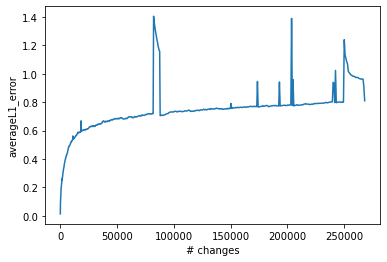

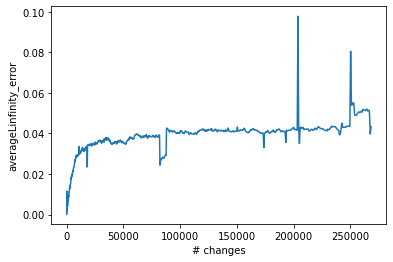

In [35]:
L1_error_graph(L1_metric)
Linfinity_error_graph(Linfinity_metric)